### Monty Hall Problem

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

### Solution: You Should Switch

Scenario 1 (1/3): You pick the right door, then the host must open a wrong door. You switch, and you land in a wrong door. \
Scenario 2 (2/3): You pick the wrong door, then the host must open the only wrong door remaining. You switch, and you land in the right door.


### Python Simulation

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class MontyHall:
    __num          = 3
    __choice       = -1
    __false_choice = -1

    def __init__(self):
        
        # three doors, one contains award
        self.award    = [False] * 3
        self.award[0] = True
        random.shuffle(self.award)
        
        # three doors are all closed
        self.door     = [False] * 3

    def choose_door(self):
        
        # choose a closed door
        while True:
            choice = random.randint(0, self.__num - 1)
            if choice != self.__choice and not self.door[choice]:
                self.__choice = choice
                break
        return None

    def open_false_door(self):
        
        # GM eliminates a wrong door
        while True:
            false_choice = random.randint(0, self.__num - 1)
            if false_choice != self.__choice and \
                not self.door[false_choice] and \
                not self.award[false_choice]:
                self.__false_choice = false_choice
                self.door[self.__false_choice] = True
                break
        return None

    def check_chosen_door(self):
        
        # check if a chosen door contains awardd
        self.door[self.__choice] = True
        return self.award[self.__choice]

In [3]:
def test_monty_hall_no_change():
    mh = MontyHall()
    mh.choose_door()
    mh.open_false_door()
    return mh.check_chosen_door()

def test_monty_hall_with_change():
    mh = MontyHall()
    mh.choose_door()
    mh.open_false_door()
    mh.choose_door()
    return mh.check_chosen_door()

def report_monty_hall_test(test_func, test_num):
    # calculate the rate of success
    true_count = 0
    for i in range(test_num):
        if test_func():
            true_count += 1
    return float(true_count) / test_num

In [20]:
def plot_results(results, name = ""):
    round_num = len(results)

    y_mean = np.mean(results)
    y_std  = np.std(results)
    x      = range(0, round_num)
    y      = results

    # frequency
    plt.title("The frequency of the success in each round")
    plt.xlabel("round")
    plt.ylabel("frequency")
    
    label_var  = r"$\sigma (X)=$%f" % (y_std)
    label_mean = "$X=$%f" % y_mean
    
    p1_label   = "%s and %s" % (label_var, label_mean)
    plt.plot(x, y, "-", label = p1_label, linewidth = 2)
    plt.legend(loc = 'upper left')
    plt.savefig("%s_frequency.png" % (name))
    plt.show()
    
    # historgram
    plt.title("The distribution plot of the frequency of the success")
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    
    plt.hist(results, 40)
    plt.savefig("%s_distrubution.png" % (name))
    plt.show()

### Simulation Result
If you don't switch, you have a average success rate of 33%.
If you switch, you have a average success rate of 66%.

Note: the result is also a living proof of the Central Limit Theorem.

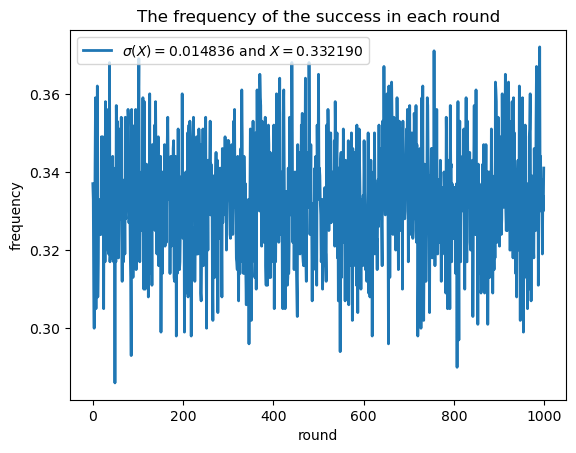

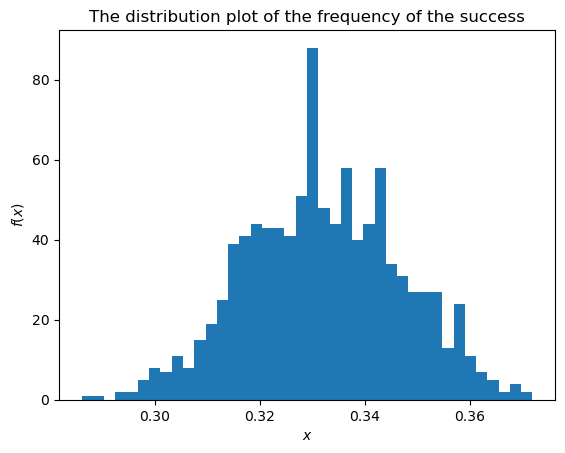

In [21]:
test_num  = 1000 # number of test in each round
round_num = 1000 # how many round

unchange_results   = list()
for i in range(round_num):
    precent = float(i) / round_num
    bar = "=" * int(precent * 80) + ">"
    bar = bar + ' ' * (81 - len(bar)) + "| 100%"
    unchange_results.append(report_monty_hall_test(test_monty_hall_no_change, test_num))
plot_results(unchange_results, "unchange")

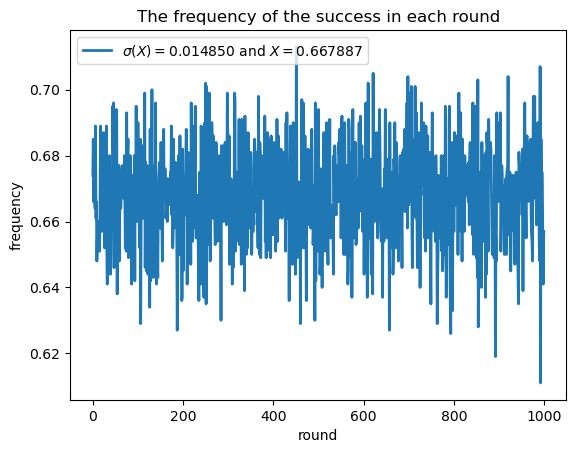

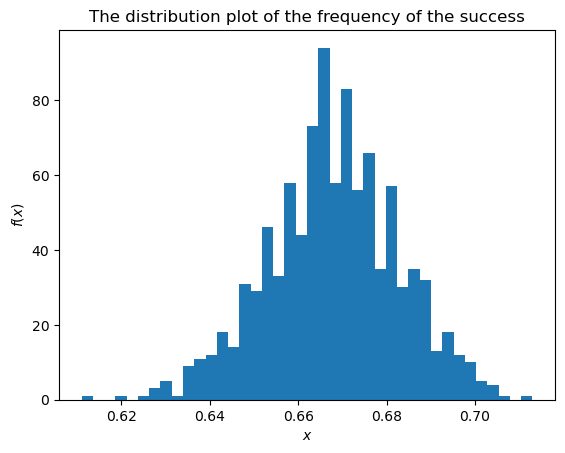

In [22]:
test_num  = 1000 # number of test in each round
round_num = 1000 # how many round

change_results    = list()
for i in range(round_num):
    precent = float(i) / round_num
    bar = "=" * int(precent * 80) + ">"
    bar = bar + ' ' * (81 - len(bar)) + "| 100%"
    change_results.append(report_monty_hall_test(test_monty_hall_with_change, test_num))
plot_results(change_results,   "change")